# Alguns Ciclos Termodinâmicos no Diagrama PV.

In [2]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
sns.set(style = 'darkgrid')

Matplotlib is building the font cache; this may take a moment.


## Ciclo de Carnot.

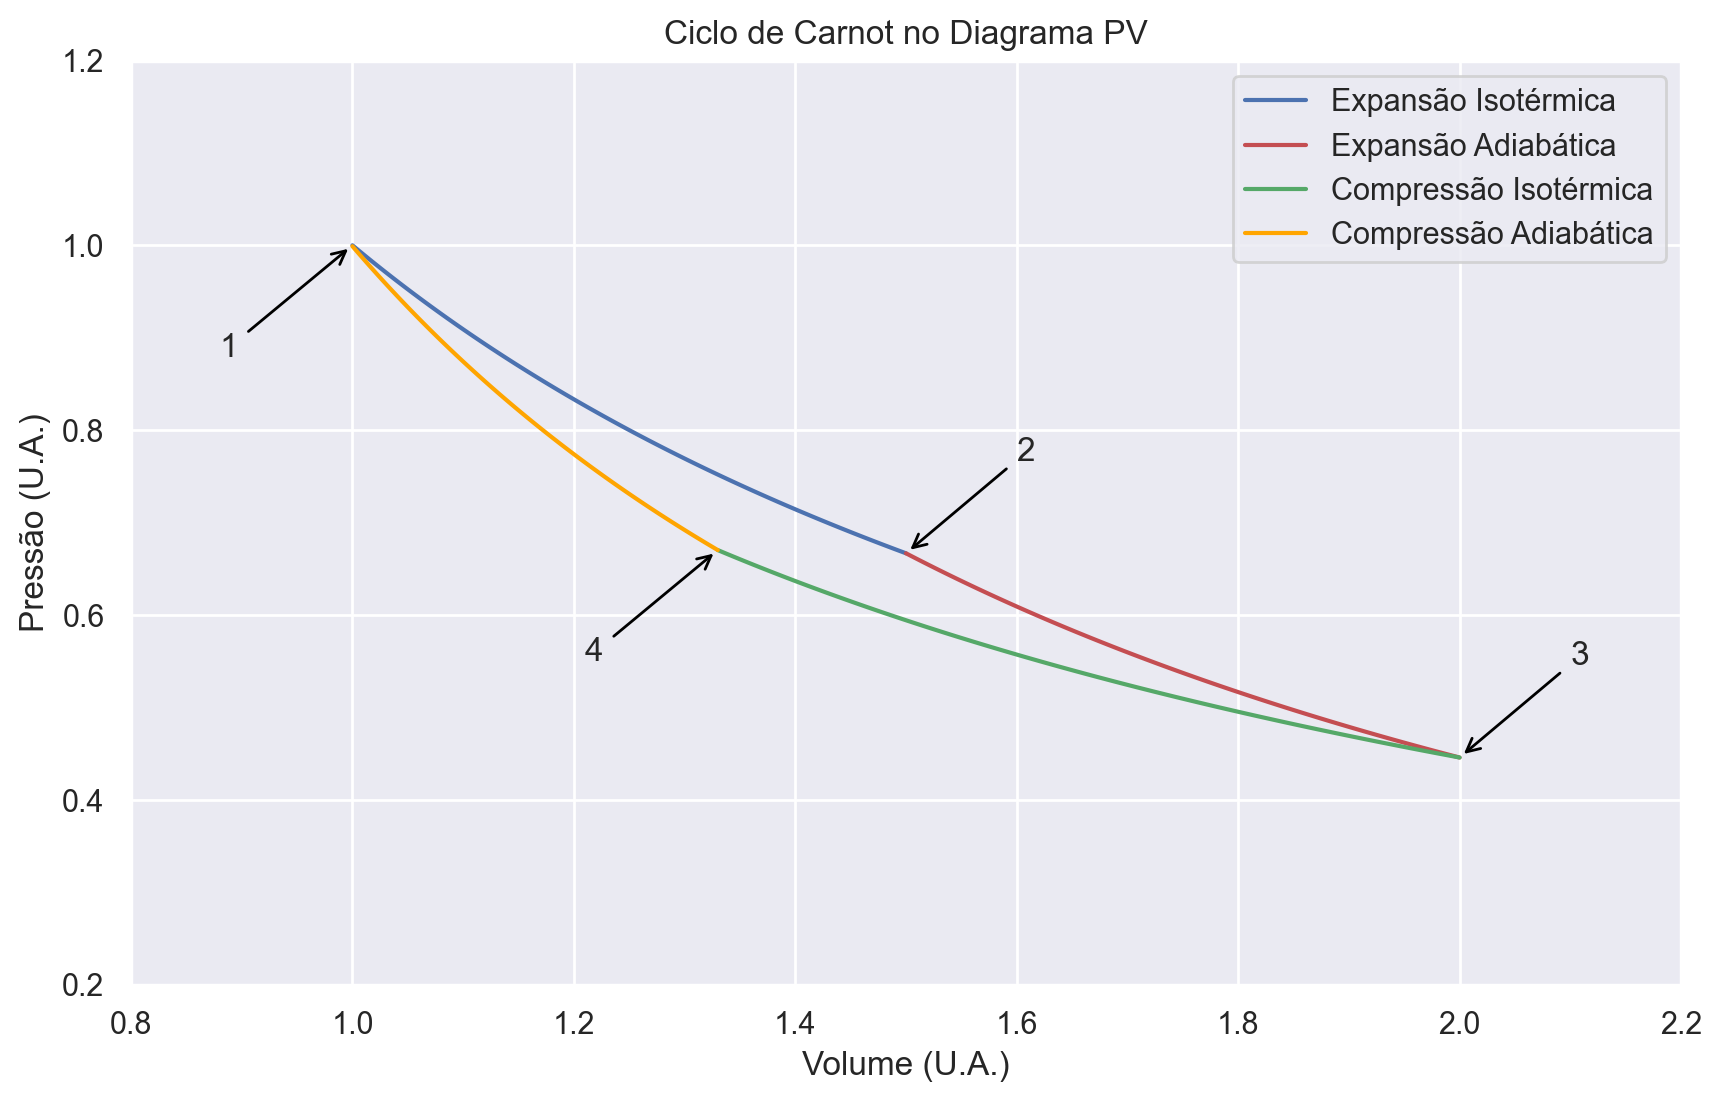

In [3]:
# Valor de gama, o coeficiente de expansão adiabática. Ele exprime a razão entre a capacidade térmica
# a pressão constante (Cp) e a capacidade térmica a volume constante (Cv), para um gás ideal.
# gamma = Cp/Cv = 1.4 para o ar a 20ºC (gás diatômico ideal) .
gamma = 1.4 

# Vamos escolher quatro valores diferentes de volume de gás para calcular as trajetórias dos processos.
# O Ponto 1 = (P1, V1) do diagrama PV define o início do ciclo. 
# Os valores e as unidades adotados são arbitrários e faremos nR = 1, por simplicidade.
V1 = 1.0
V2 = 1.5 
V3 = 2.0
V4 = 1.33

# Ponto 1: Início do primeiro processo - expansão isotérmica do gás. Vamos usar a equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. Logo: PV = T.
P1 = 1.0  # Pressão no Ponto 1 do Diagrama PV.
T1 = P1 * V1  # Temperatura no Ponto 1 do Diagrama PV.
# Ponto 2: Final do primeiro processo - expansão isotérmica do gás.
# Temperatura no Ponto 2 do Diagrama PV é a mesma que a do Ponto 1. Essa temperatura deve 
# ser a mesma que aquela do Ponto 1, pois ocorreu uma expansão isotérmica.
T2 = T1      
# Gerando os pontos para a curva que representa a expansão isotérmica do gás.
V_exp_isobarica = np.linspace(V1, V2, 100)
P_exp_isobarica = T1 / V_exp_isobarica

# Ponto 2: Início do segundo processo - expansão adiabática do gás. 
# No Ponto 2 do ciclo, o volume do gás é V2. Logo, a pressão no Ponto 2 do Diagrama PV será:
P2 = T2 / V2 
# Ponto 3: Final do segundo processo - expansão adiabática do gás.
# Para um processo adiabático, P*V^gamma = constante, então P3*V3^gamma = P2*V2^gamma. 
# Podemos encontrar o valor da pressão P3 usando os valores dos volumes V2 e V3, conhecendo P2.
P3 = P2 * (V2 ** gamma) / (V3 ** gamma)
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_exp_adiabatica = np.linspace(V2, V3, 100)
P_exp_adiabatica = P2 * (V2 ** gamma) / (V_exp_adiabatica ** gamma)

# Ponto 3: Início do terceiro Processo - compressão isotérmica do gás. Usamos a equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. 
# No ponto 3 do ciclo, a pressão do gás é P3 e o volume é V3. Logo, a temperatura será:
T3 = P3 * V3
# Gerando os pontos para a curva que representa a compressão isotérmica do gás.
V_comp_isobarica = np.linspace(V3, V4, 100)
P_comp_isobarica = T3 / V_comp_isobarica

# Ponto 4: Início do quarto Processo - compressão adiabática do gás. 
# Temperatura no Ponto 4 do Diagrama PV é a mesma que a do Ponto 3. Essa temperatura deve 
# ser a mesma que aquela do Ponto 3, pois ocorreu uma compressão isotérmica.
T4 = T3
# Pressão no Ponto 4 do diagrama PV. Usamos a equação de estado dos gases ideais: PV = nRT,
# com nR = 1, por simplicidade. Isto porque o processo 3->4 é uma compressão isotérmica.
P4 = T4 / V4
# Voltando ao Ponto 1: Final do ciclo.
# Para um processo adiabático, P*V^gamma = constante, então P1*V1^gamma = P4*V4^gamma. 
# Podemos encontrar o valor da pressão no Ponto 1 usando os valores dos volumes V1 e V4, conhecendo P4.
# Gerando os pontos para a curva que representa a compressão adiabática do gás.
V_comp_adiabatica = np.linspace(V4, V1, 100)
P_comp_adiabatica = P4 * (V4 ** gamma) / (V_comp_adiabatica ** gamma)

# Plotagem do diagrama PV.
plt.subplots(1, 1, figsize = (10, 6), dpi = 200)
plt.plot(V_exp_isobarica, P_exp_isobarica, 'b', label = 'Expansão Isotérmica')
plt.plot(V_exp_adiabatica, P_exp_adiabatica, 'r', label = 'Expansão Adiabática')
plt.plot(V_comp_isobarica, P_comp_isobarica, 'g', label = 'Compressão Isotérmica')
plt.plot(V_comp_adiabatica, P_comp_adiabatica, 'orange', label = 'Compressão Adiabática')
plt.xlabel('Volume (U.A.)')
plt.ylabel('Pressão (U.A.)')
plt.xlim((0.8, 2.2))
plt.ylim((0.2, 1.2))
plt.title('Ciclo de Carnot no Diagrama PV')
plt.legend()
plt.grid(True)
# Setas indicando os inícios dos processos do ciclo.
plt.annotate('1', (V1, P1), (V1 - 0.12, P1 - 0.12), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('2', (V2, P2), (V2 + 0.1, P2 + 0.1), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('3', (V3, P3), (V3 + 0.1, P3 + 0.1), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('4', (V4, P4), (V4 - 0.12, P4 - 0.12), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.show()

## Ciclo Stirling.

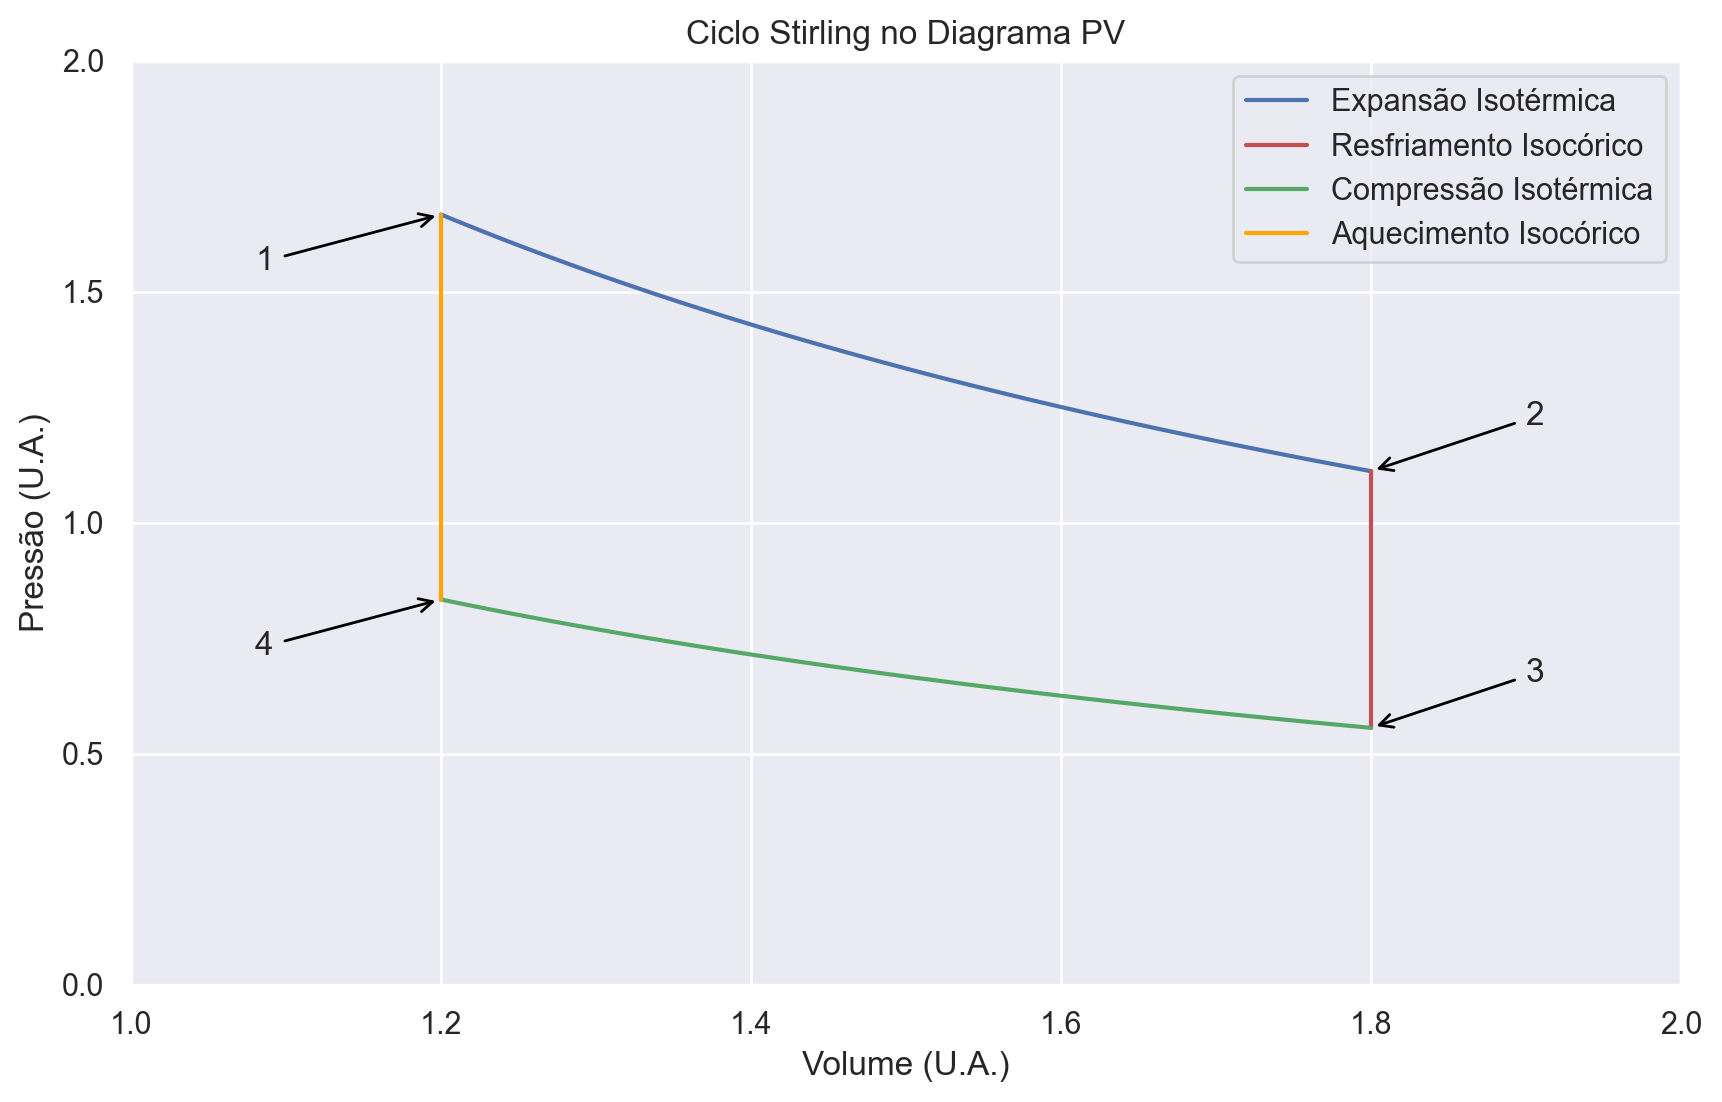

In [4]:
# Vamos escolher dois valores diferentes de volume de gás para calcular as trajetórias dos processos.
# O ponto 1 = (P1, V1) define o início do ciclo. Os valores e as unidades adotados são arbitrários e
# faremos nR = 1, por simplicidade.
V1 = V4 = 1.2
V2 = V3 = 1.8 

# Ponto 1: Início do primeiro processo - expansão isotérmica do gás. Vamos usar a equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. Logo: PV = T.
T1 = 2.0  # Temperatura no Ponto 1 do Diagrama PV.
P1 = T1 / V1  # Pressão no Ponto 1 do Diagrama PV.
# Ponto 2: Final do primeiro processo - expansão isotérmica do gás.
# Temperatura no Ponto 2 do Diagrama PV é a mesma que a do Ponto 1. Essa temperatura deve 
# ser a mesma que aquela do Ponto 1, pois ocorreu uma expansão isotérmica.
T2 = T1      
# Gerando os pontos para a curva que representa a expansão isotérmica do gás.
V_exp_isobarica = np.linspace(V1, V2, 100)
P_exp_isobarica = T1 / V_exp_isobarica

# Ponto 2: Início do segundo processo: resfriamento isocórico (volume constante) do gás. 
# No Ponto 2 do ciclo, o volume do gás é V2. A pressão no Ponto 2 é dada pela equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. 
P2 = T2 / V2 
# No ponto 3 do ciclo, a temperatura será T3, menor que T1 (ou T2):
T3 = 1.0
# Para um processo isocórico ou isovolumétrico (com volume constante), P3*T2 = P2*T3.
P3 = P2 * T3 / T2
# Gerando os pontos para a curva que representa a desaquecimento isocórico do gás.
P_descomp_isocorica = np.linspace(P2, P3, 100)
V_descomp_isocorica = np.linspace(V2, V3, 100)

# Ponto 3: Início do terceiro Processo - compressão isotérmica do gás. Usamos a equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. 
# Gerando os pontos para a curva que representa a compressão isotérmica do gás.
V_comp_isobarica = np.linspace(V3, V4, 100)
P_comp_isobarica = T3 / V_comp_isobarica

# Ponto 4: Início do quarto processo: aquecimento isocórico (volume constante) do gás. 
# Temperatura no Ponto 4 do Diagrama PV é a mesma que a do Ponto 3. Essa temperatura deve 
# ser a mesma que aquela do Ponto 3, pois ocorreu uma compressão isotérmica.
T4 = T3
# No Ponto 4 do ciclo, o volume do gás é V4. A pressão no Ponto 4 é dada pela equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. 
P4 = T4 / V4 
# Gerando os pontos para a curva que representa o aquecimento isocórico do gás.
P_comp_isocorica = np.linspace(P4, P1, 100)
V_comp_isocorica = np.linspace(V4, V1, 100)

# Plotagem do diagrama PV.
plt.subplots(1, 1, figsize = (10, 6), dpi = 200)
plt.plot(V_exp_isobarica, P_exp_isobarica, 'b', label = 'Expansão Isotérmica')
plt.plot(V_descomp_isocorica, P_descomp_isocorica, 'r', label = 'Resfriamento Isocórico')
plt.plot(V_comp_isobarica, P_comp_isobarica, 'g', label = 'Compressão Isotérmica')
plt.plot(V_comp_isocorica, P_comp_isocorica, 'orange', label = 'Aquecimento Isocórico')
plt.xlabel('Volume (U.A.)')
plt.ylabel('Pressão (U.A.)')
plt.xlim((1.0, 2.0))
plt.ylim((0, 2.0))
plt.title('Ciclo Stirling no Diagrama PV')
plt.legend()
plt.grid(True)
# Setas indicando os inícios dos processos do ciclo.
plt.annotate('1', (V1, P1), (V1 - 0.12, P1 - 0.12), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('2', (V2, P2), (V2 + 0.1, P2 + 0.1), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('3', (V3, P3), (V3 + 0.1, P3 + 0.1), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('4', (V4, P4), (V4 - 0.12, P4 - 0.12), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(0.5))
plt.show()

## Ciclo Diesel.

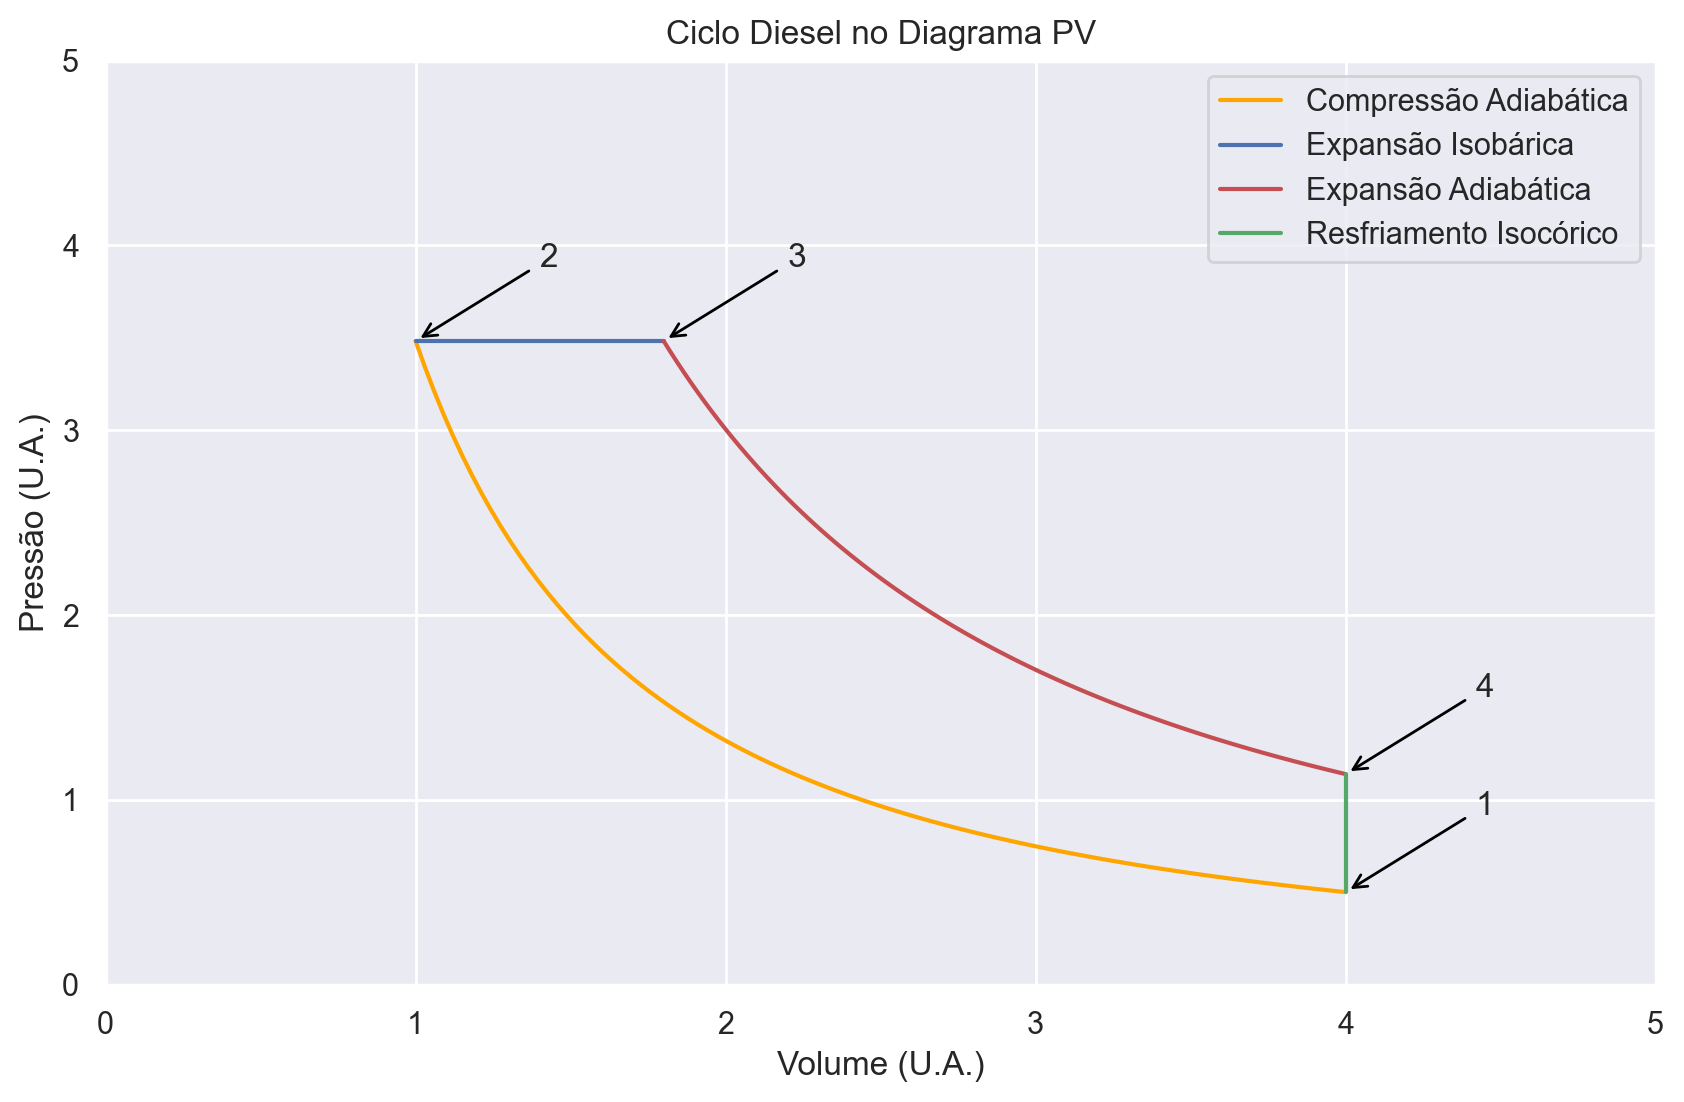

In [5]:
# Valor de gama, o coeficiente de expansão adiabática. Ele exprime a razão entre a capacidade térmica
# a pressão constante (Cp) e a capacidade térmica a volume constante (Cv), para um gás ideal.
# gamma = Cp/Cv = 1.4 para o ar a 20ºC (gás diatômico ideal) .
gamma = 1.4 

# Vamos escolher três valores diferentes de volume de gás para calcular as trajetórias dos processos.
# O ponto 1 = (P1, V1) define o início do ciclo. Os valores e as unidades adotados são arbitrários e
# faremos nR = 1, por simplicidade.
V1 = V4 = 4.0
V2 = 1.0

# Ponto 1: Início do primeiro processo - compressão adiabática do gás. 
# No Ponto 1 do ciclo, o volume do gás é V1 e a pressão é P1:
# Para um processo adiabático, P*V^gamma = constante, então P2*V2^gamma = P1*V1^gamma. 
# Podemos encontrar o valor da pressão P2 usando os valores dos volumes V1 e V2, conhecendo P1.
T1 = 2.0  # Temperatura no Ponto 1 do Diagrama PV.
P1 = T1 / V1  # Pressão no Ponto 1 do Diagrama PV.
# Ponto 2: Final do primeiro processo - compressão adiabática do gás. (T1≠T2).
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_comp_adiabatica = np.linspace(V1, V2, 100)
P_comp_adiabatica = P1 * ((V1 / V_comp_adiabatica) ** gamma)

# Ponto 2: Final do primeiro processo - expansão adiabática do gás (T1≠T2).
T2 = T1 * (V1 / V2)**(gamma-1)
# Para um processo adiabático, P*V^gamma = constante, então P2*V2^gamma = P1*V1^gamma.
P2 = P1 * (V1 / V2) ** gamma 
# Ponto 2: Início do segundo processo - expansão isobárica do gás. 
P3 = P2
# Gerando os pontos para a curva que representa a expansão isobárica do gás.
V_exp_isobarica = np.linspace(V2, V3, 100)
P_exp_isobarica = np.linspace(P2, P3, 100)

# Ponto 3, final do segundo processo - expansão isobárica do gás. Vamos usar a equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. Logo: PV = T.
# No Ponto 3 do ciclo, o volume do gás é V3 e a pressão é P3.
T3 = T2 * (V3 / V2)
# Ponto 3, início do terceiro processo - expansão adiabática do gás.
# Para um processo adiabático, P*V^gamma = constante, então P3*V3^gamma = P2*V2^gamma. 
# Podemos encontrar o valor da pressão P4 usando os valores dos volumes V3 e V4, conhecendo P3.
P4 = P3 * (V3 / V4) ** gamma
# A temperatura no Ponto 4 é dada pela relação T*V^(gamma-1) = constante (expansão adiabática):
T4 = T3 * (V3 / V4)**(gamma-1)
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_exp_adiabatica = np.linspace(V3, V4, 100)
P_exp_adiabatica = P3 * ((V3 / V_exp_adiabatica) ** gamma)

# Ponto 4: Início do terceiro processo: resfriamento isocórico (volume constante) do gás. 
# No Ponto 4 do ciclo, a pressão é P4 e a temperatura é T4. 
# No ponto 1 do ciclo, a temperatura será T1, menor que T4.
# Para um processo isocórico ou isovolumétrico (com volume constante), P4*T3 = P3*T4.
P1 = P4 * T1 / T4
# Gerando os pontos para a curva que representa o resfriamento isocórico do gás.
P_descomp_isocorica = np.linspace(P4, P1, 100)
V_descomp_isocorica = np.linspace(V4, V1, 100)

# Plotagem do diagrama PV.
plt.subplots(1, 1, figsize = (10, 6), dpi = 200)
plt.plot(V_comp_adiabatica, P_comp_adiabatica, 'orange', label = 'Compressão Adiabática')
plt.plot(V_exp_isobarica, P_exp_isobarica, 'b', label = 'Expansão Isobárica')
plt.plot(V_exp_adiabatica, P_exp_adiabatica, 'r', label = 'Expansão Adiabática')
plt.plot(V_descomp_isocorica, P_descomp_isocorica, 'g', label = 'Resfriamento Isocórico')
plt.xlabel('Volume (U.A.)')
plt.ylabel('Pressão (U.A.)')
plt.xlim((0, 5.0))
plt.ylim((0, 5.0))
plt.title('Ciclo Diesel no Diagrama PV')
plt.legend()
plt.grid(True)
# Setas indicando os inícios dos processos do ciclo.
plt.annotate('1', (V1, P1), (V1 + 0.42, P1 + 0.42), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('2', (V2, P2), (V2 + 0.4, P2 + 0.4), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('3', (V3, P3), (V3 + 0.4, P3 + 0.4), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('4', (V4, P4), (V4 + 0.42, P4 + 0.42), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.show()

## Ciclo Otto.

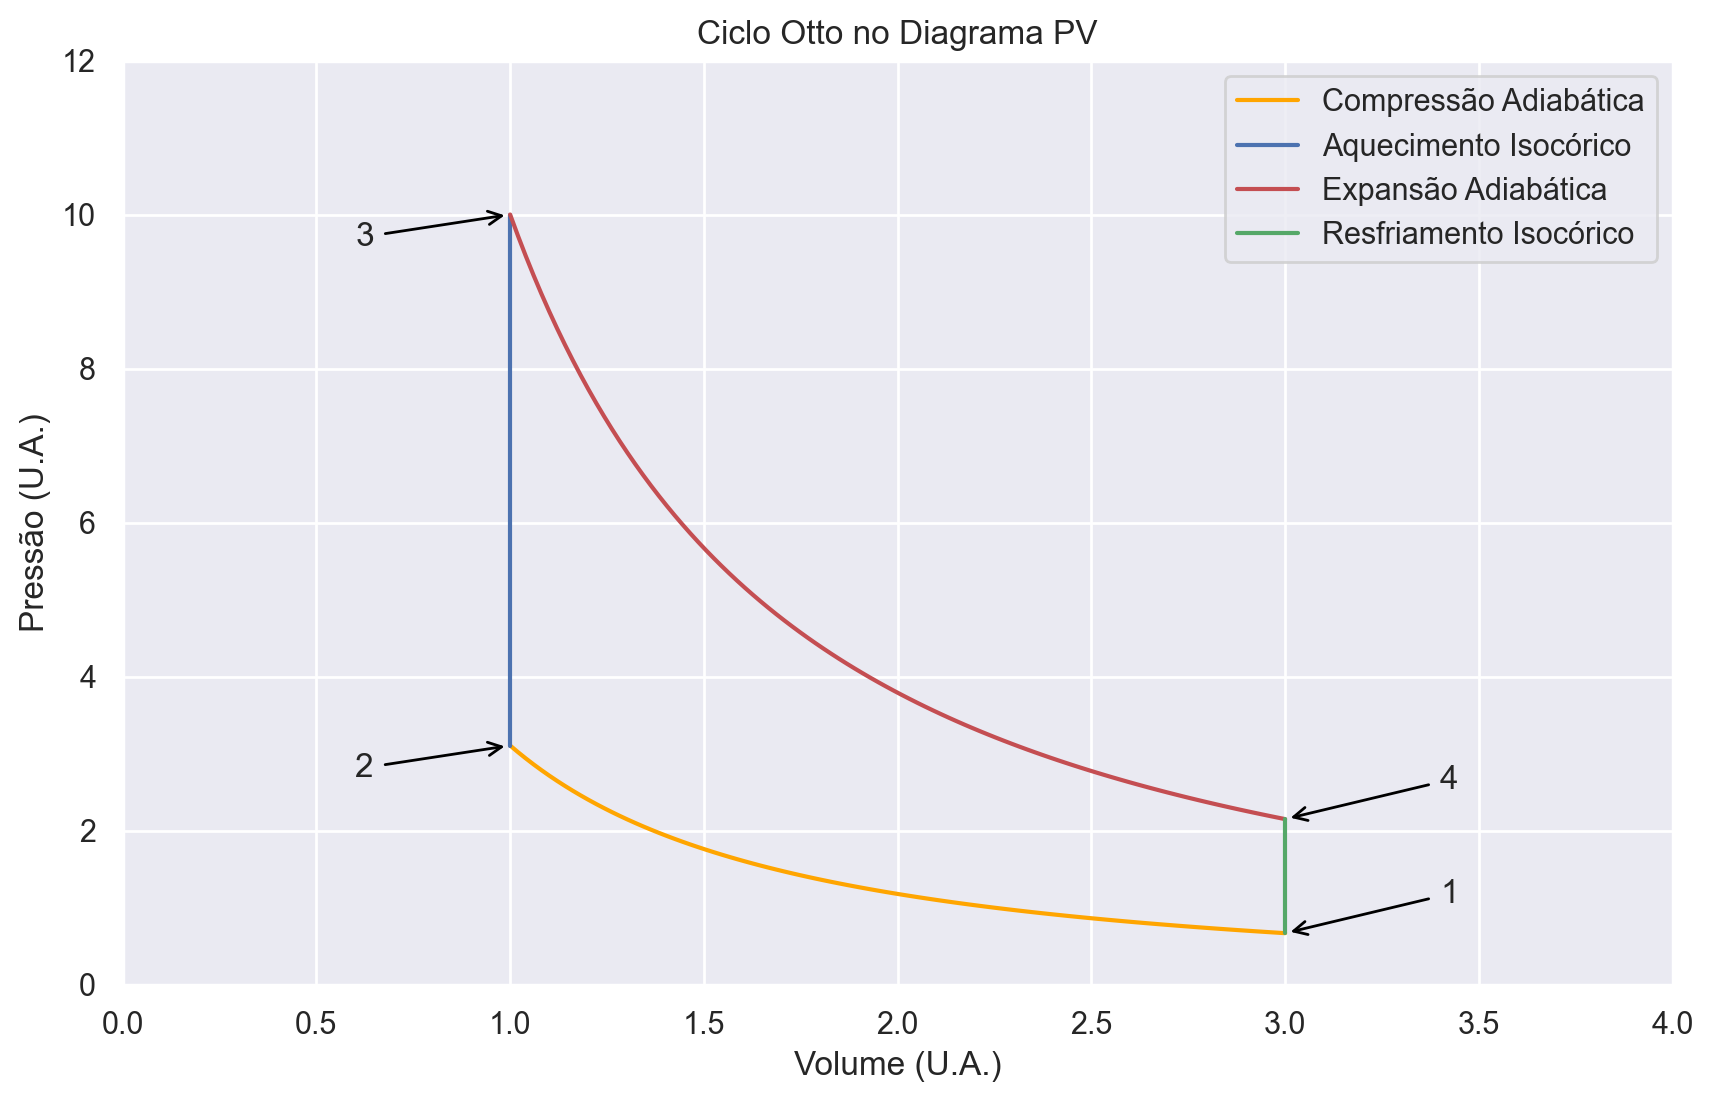

In [6]:
# Valor de gama, o coeficiente de expansão adiabática. Ele exprime a razão entre a capacidade térmica
# a pressão constante (Cp) e a capacidade térmica a volume constante (Cv), para um gás ideal.
# gamma = Cp/Cv = 1.4 para o ar a 20ºC (gás diatômico ideal) .
gamma = 1.4 

# Vamos escolher três valores diferentes de volume de gás para calcular as trajetórias dos processos.
# O ponto 1 = (P1, V1) define o início do ciclo. Os valores e as unidades adotados são arbitrários e
# faremos nR = 1, por simplicidade.
V1 = V4 = 3.0
V2 = V3 = 1.0

# Ponto 1: Início do primeiro processo - compressão adiabática do gás. 
# No Ponto 1 do ciclo, o volume do gás é V1 e a pressão é P1:
# Para um processo adiabático, P*V^gamma = constante, então P2*V2^gamma = P1*V1^gamma. 
# Podemos encontrar o valor da pressão P2 usando os valores dos volumes V1 e V2, conhecendo P1.
T1 = 2.0  # Temperatura no Ponto 1 do Diagrama PV.
P1 = T1 / V1  # Pressão no Ponto 1 do Diagrama PV.
# Ponto 2: Final do primeiro processo - compressão adiabática do gás. (T1≠T2).
P2 = P1 * (V1 / V2) ** gamma 
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_comp_adiabatica = np.linspace(V1, V2, 100)
P_comp_adiabatica = P1 * ((V1 / V_comp_adiabatica) ** gamma)

# Ponto 2: Final do primeiro processo - expansão adiabática do gás (T1≠T2).
T2 = T1 * (V1 / V2)**(gamma-1)
# Ponto 2: Início do segundo processo - aquecimento isocórico do gás. 
# Para um processo isocórico ou isovolumétrico (com volume constante), P2*T3 = P3*T2.
# No ponto 3 do ciclo, a temperatura será T3, maior que T1 (ou T2):
T3 = 10.0 # Temperatura no Ponto 3 do Diagrama PV.
P3 = P2 * (T3 / T2) # Pressão no Ponto 3 do Diagrama PV.
# Gerando os pontos para a curva que representa o aquecimento isocórico do gás.
V_exp_isobarica = np.linspace(V2, V3, 100)
P_exp_isobarica = np.linspace(P2, P3, 100)

# Ponto 3, final do segundo processo - expansão isobárica do gás. Vamos usar a equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. Logo: PV = T.
# Ponto 3, início do terceiro processo - expansão adiabática do gás.
# Para um processo adiabático, P*V^gamma = constante, então P4*V4^gamma = P3*V3^gamma. 
# Podemos encontrar o valor da pressão P4 usando os valores dos volumes V3 e V4, conhecendo P3.
P4 = P3 * (V3 / V4) ** gamma
# A temperatura no Ponto 4 é dada pela relação T*V^(gamma-1) = constante (expansão adiabática):
T4 = T3 * (V3 / V4)**(gamma-1)
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_exp_adiabatica = np.linspace(V3, V4, 100)
P_exp_adiabatica = P3 * ((V3 / V_exp_adiabatica) ** gamma)

# Ponto 4: Início do terceiro processo: resfriamento isocórico (volume constante) do gás. 
# No Ponto 4 do ciclo, a pressão é P4 e a temperatura é T4. 
# No ponto 1 do ciclo, a temperatura será T1, menor que T4.
# Para um processo isocórico ou isovolumétrico (com volume constante), P4*T3 = P3*T4.
P1 = P4 * T1 / T4
# Gerando os pontos para a curva que representa o resfriamento isocórico do gás.
P_descomp_isocorica = np.linspace(P4, P1, 100)
V_descomp_isocorica = np.linspace(V4, V1, 100)

# Plotagem do diagrama PV.
plt.subplots(1, 1, figsize = (10, 6), dpi = 200)
plt.plot(V_comp_adiabatica, P_comp_adiabatica, 'orange', label = 'Compressão Adiabática')
plt.plot(V_exp_isobarica, P_exp_isobarica, 'b', label = 'Aquecimento Isocórico')
plt.plot(V_exp_adiabatica, P_exp_adiabatica, 'r', label = 'Expansão Adiabática')
plt.plot(V_descomp_isocorica, P_descomp_isocorica, 'g', label = 'Resfriamento Isocórico')
plt.xlabel('Volume (U.A.)')
plt.ylabel('Pressão (U.A.)')
plt.xlim((0, 4.0))
plt.ylim((0, 12.0))
plt.title('Ciclo Otto no Diagrama PV')
plt.legend()
plt.grid(True)
# Setas indicando os inícios dos processos do ciclo.
plt.annotate('1', (V1, P1), (V1 + 0.4, P1 + 0.4), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('2', (V2, P2), (V2 - 0.4, P2 - 0.4), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('3', (V3, P3), (V3 - 0.4, P3 - 0.4), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('4', (V4, P4), (V4 + 0.4, P4 + 0.4), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.show()

## Ciclo Brayton-Joule.

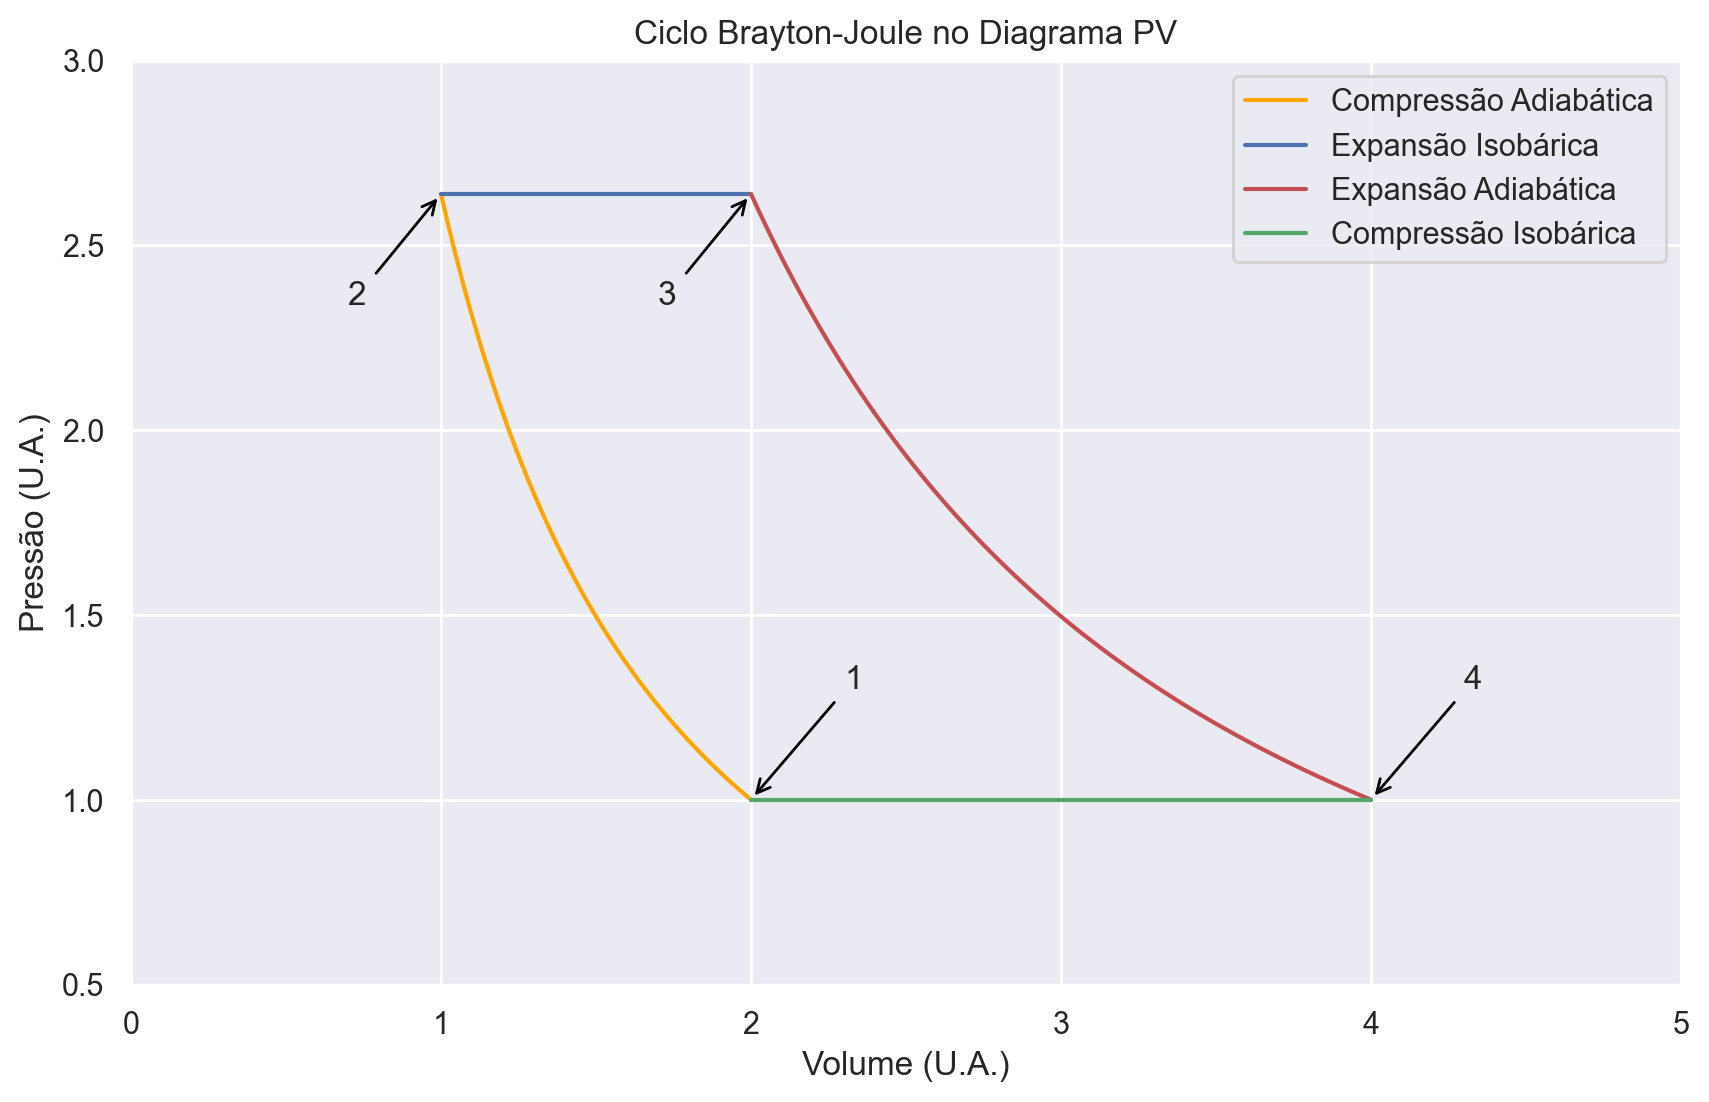

In [7]:
# Valor de gama, o coeficiente de expansão adiabática. Ele exprime a razão entre a capacidade térmica
# a pressão constante (Cp) e a capacidade térmica a volume constante (Cv), para um gás ideal.
# gamma = Cp/Cv = 1.4 para o ar a 20ºC (gás diatômico ideal) .
gamma = 1.4 

# Vamos escolher três valores diferentes de volume de gás para calcular as trajetórias dos processos.
# O ponto 1 = (P1, V1) define o início do ciclo. Os valores e as unidades adotados são arbitrários e
# faremos nR = 1, por simplicidade.
V1 = 2.0
V2 = 1.0
V3 = 2.0
V4 = 4.0

# Ponto 1: Início do primeiro processo - compressão adiabática do gás. 
# No Ponto 1 do ciclo, o volume do gás é V1 e a pressão é P1:
# Para um processo adiabático, P*V^gamma = constante, então P2*V2^gamma = P1*V1^gamma. 
# Podemos encontrar o valor da pressão P2 usando os valores dos volumes V1 e V2, conhecendo P1.
T1 = 2.0  # Temperatura no Ponto 1 do Diagrama PV.
P1 = T1 / V1  # Pressão no Ponto 1 do Diagrama PV.
# Ponto 2: Final do primeiro processo - compressão adiabática do gás. (T1≠T2).
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_comp_adiabatica = np.linspace(V1, V2, 100)
P_comp_adiabatica = P1 * ((V1 / V_comp_adiabatica) ** gamma)

# Ponto 2: Final do primeiro processo - expansão adiabática do gás (T1≠T2).
T2 = T1 * (V1 / V2)**(gamma-1)
# Para um processo adiabático, P*V^gamma = constante, então P2*V2^gamma = P1*V1^gamma.
P2 = P1 * (V1 / V2) ** gamma 
# Ponto 2: Início do segundo processo - expansão isobárica do gás. 
P3 = P2
# Gerando os pontos para a curva que representa a expansão isobárica do gás.
V_exp_isobarica = np.linspace(V2, V3, 100)
P_exp_isobarica = np.linspace(P2, P3, 100)

# Ponto 3, final do segundo processo - expansão isobárica do gás. Vamos usar a equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. Logo: PV = T.
# No Ponto 3 do ciclo, o volume do gás é V3 e a pressão é P3.
T3 = T2 * (V3 / V2)
# Ponto 3, início do terceiro processo - expansão adiabática do gás.
# Para um processo adiabático, P*V^gamma = constante, então P4*V4^gamma = P3*V3^gamma. 
P4 = P3 * (V3 / V4) ** gamma
# A temperatura no Ponto 4 é dada pela relação T*V^(gamma-1) = constante (expansão adiabática):
T4 = T3 * (V3 / V4)**(gamma-1)
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_exp_adiabatica = np.linspace(V3, V4, 100)
P_exp_adiabatica = P3 * ((V3 / V_exp_adiabatica) ** gamma)

# Ponto 4, final do terceiro processo - expansão adiabática do gás.
# Ponto 4, início do quarto processo - compressão isobárica do gás.
P1 = P4
# Gerando os pontos para a curva que representa a expansão isobárica do gás.
V_comp_isobarica = np.linspace(V4, V1, 100)
P_comp_isobarica = np.linspace(P4, P1, 100)

# Plotagem do diagrama PV.
plt.subplots(1, 1, figsize = (10, 6), dpi = 200)
plt.plot(V_comp_adiabatica, P_comp_adiabatica, 'orange', label = 'Compressão Adiabática')
plt.plot(V_exp_isobarica, P_exp_isobarica, 'b', label = 'Expansão Isobárica')
plt.plot(V_exp_adiabatica, P_exp_adiabatica, 'r', label = 'Expansão Adiabática')
plt.plot(V_comp_isobarica, P_comp_isobarica, 'g', label = 'Compressão Isobárica')
plt.xlabel('Volume (U.A.)')
plt.ylabel('Pressão (U.A.)')
plt.xlim((0, 5.0))
plt.ylim((0.5, 3.0))
plt.title('Ciclo Brayton-Joule no Diagrama PV')
plt.legend()
plt.grid(True)
# Setas indicando os inícios dos processos do ciclo.
plt.annotate('1', (V1, P1), (V1 + 0.3, P1 + 0.3), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('2', (V2, P2), (V2 - 0.3, P2 - 0.3), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('3', (V3, P3), (V3 - 0.3, P3 - 0.3), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('4', (V4, P4), (V4 + 0.3, P4 + 0.3), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.show()

## Ciclo Ericsson.

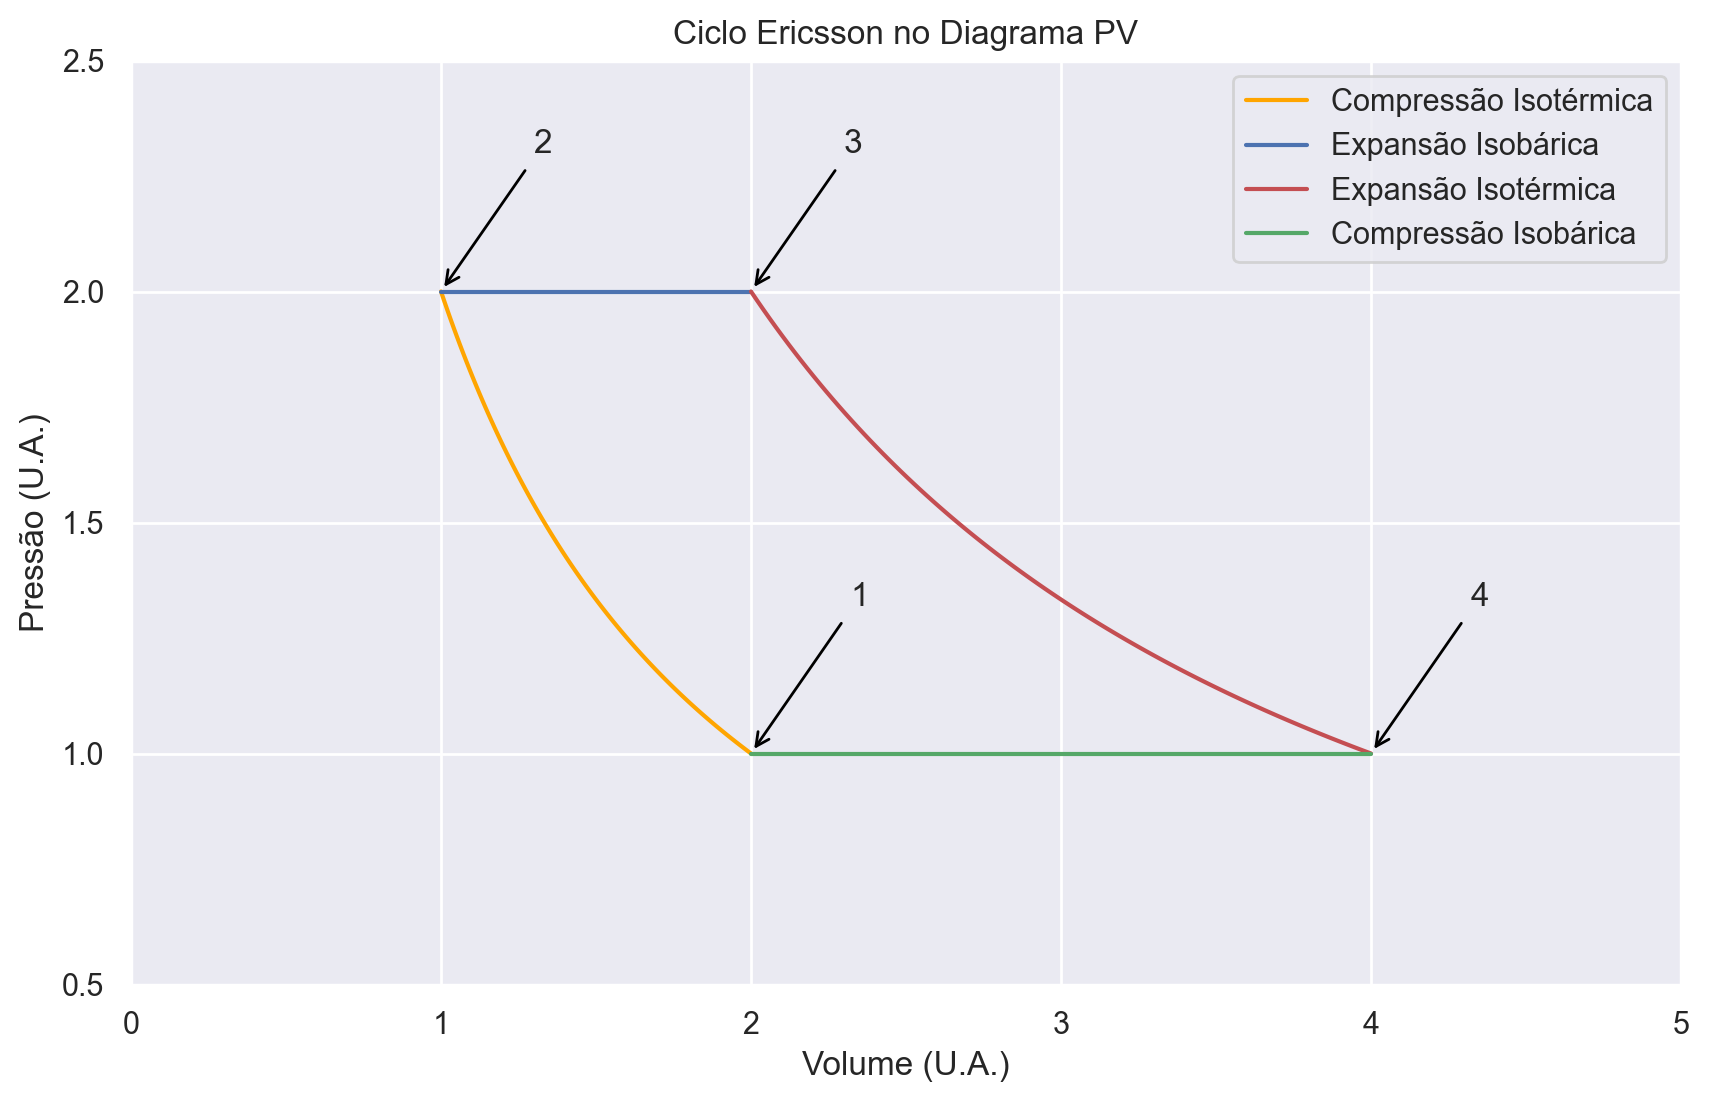

In [8]:
# Vamos escolher três valores diferentes de volume de gás para calcular as trajetórias dos processos.
# O ponto 1 = (P1, V1) define o início do ciclo. Os valores e as unidades adotados são arbitrários e
# faremos nR = 1, por simplicidade.
V1 = 2.0
V2 = 1.0
V3 = 2.0
V4 = 4.0

# Ponto 1: Início do primeiro processo - compressão isotérmica do gás. 
# No Ponto 1 do ciclo, o volume do gás é V1 e a pressão é P1:
# Podemos encontrar o valor da pressão P2 usando os valores dos volumes V1 e V2, conhecendo P1.
T1 = 2.0  # Temperatura no Ponto 1 do Diagrama PV.
P1 = T1 / V1  # Pressão no Ponto 1 do Diagrama PV.
# Ponto 2: Final do primeiro processo - compressão isotérmica do gás.
# Gerando os pontos para a curva que representa a compressão isotérmica do gás.
V_comp_isotermica = np.linspace(V1, V2, 100)
P_comp_isotermica = P1 * (V1 / V_comp_adiabatica)

# Ponto 2: Final do primeiro processo - expansão isotérmica do gás.
T2 = T1 
P2 = P1 * (V1 / V2)
# Ponto 2: Início do segundo processo - expansão isobárica do gás. 
P3 = P2
# Gerando os pontos para a curva que representa a expansão isobárica do gás.
V_exp_isobarica = np.linspace(V2, V3, 100)
P_exp_isobarica = np.linspace(P2, P3, 100)

# Ponto 3, final do segundo processo - expansão isobárica do gás. Vamos usar a equação 
# de estado dos gases ideais: PV = nRT, com nR = 1, por simplicidade. Logo: PV = T.
# No Ponto 3 do ciclo, o volume do gás é V3 e a pressão é P3.
T3 = T2 * (V3 / V2)
# Ponto 3, início do terceiro processo - expansão isotérmica do gás. 
P4 = P3 * (V3 / V4)
# A temperatura no Ponto 4 é igual à temperatura no Ponto 3 (isoterma):
T4 = T3 
# Gerando os pontos para a curva que representa a expansão adiabática do gás.
V_exp_isotermica = np.linspace(V3, V4, 100)
P_exp_isotermica = P3 * (V3 / V_exp_adiabatica)

# Ponto 4, final do terceiro processo - expansão isotérmica do gás.
# Ponto 4, início do quarto processo - compressão isobárica do gás.
P1 = P4
# Gerando os pontos para a curva que representa a compressão isobárica do gás.
V_comp_isobarica = np.linspace(V4, V1, 100)
P_comp_isobarica = np.linspace(P4, P1, 100)

# Plotagem do diagrama PV.
plt.subplots(1, 1, figsize = (10, 6), dpi = 200)
plt.plot(V_comp_isotermica, P_comp_isotermica, 'orange', label = 'Compressão Isotérmica')
plt.plot(V_exp_isobarica, P_exp_isobarica, 'b', label = 'Expansão Isobárica')
plt.plot(V_exp_isotermica, P_exp_isotermica, 'r', label = 'Expansão Isotérmica')
plt.plot(V_comp_isobarica, P_comp_isobarica, 'g', label = 'Compressão Isobárica')
plt.xlabel('Volume (U.A.)')
plt.ylabel('Pressão (U.A.)')
plt.xlim((0, 5.0))
plt.ylim((0.5, 2.5))
plt.title('Ciclo Ericsson no Diagrama PV')
plt.legend()
plt.grid(True)
# Setas indicando os inícios dos processos do ciclo.
plt.annotate('1', (V1, P1), (V1 + 0.32, P1 + 0.32), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('2', (V2, P2), (V2 + 0.3, P2 + 0.3), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('3', (V3, P3), (V3 + 0.3, P3 + 0.3), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.annotate('4', (V4, P4), (V4 + 0.32, P4 + 0.32), arrowprops = dict(arrowstyle = '->', color = 'black'), fontsize = 12)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(0.5))
plt.show()